<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Minicurso-Python/Aula04/Minicurso_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Biblioteca e Dados

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Carregando dataset da biblioteca Seaborn
tips = sns.load_dataset('tips')

# Descrevendo os Dados

**Estes dados representam uma amostra de dados coletados por um restaurante**

In [0]:
#Visualizar as 5 primeiras linhas do meu Dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Descrição dos Dados**

Este é um dataset que a própria biblioteca fornece, o mesmo contém alguns registros de clientes de um restaurante.

Total_bill: Custo total da refeição em dólares.

Tip: Valor da gorjeta em dólares.

Sex: Sexo (Feminino / Masculino).

Smoker: Se a área escolhida era para fumantes ou não.

Day: Dia da semana.

Time: Almoço (Lunch) ou jantar (Dinner).

Size: Tamanho da refeição.



In [0]:
#Verificar a estrutura do DataFrame
tips.shape

(244, 7)

In [0]:
#Verificando a descrição estatística dos dados, com 2 casas decimais
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [0]:
#Verificar o número de Homens e Mulheres na Amostra
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [0]:
#Verificar a porcentagem de Homens e Mulheres na Amostra
tips['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

# Visualizando e Configurando Gráficos

  **Gráfico de Barras**

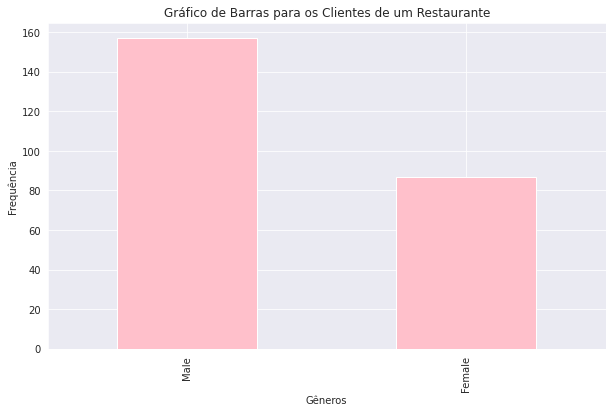

In [0]:
#Aumentar o tamanho da figura
plt.figure(figsize=(10, 6))

#Setar uma cor para cada coluna exibida
tips['sex'].value_counts().plot(kind='bar', color='pink')

#Definir um título para o Gráfico
plt.title('Gráfico de Barras para os Clientes de um Restaurante')

#Nomear os eixos do Gráfico
plt.xlabel('Gêneros')
plt.ylabel('Frequência')

#Exibir o Gráfico
plt.show()


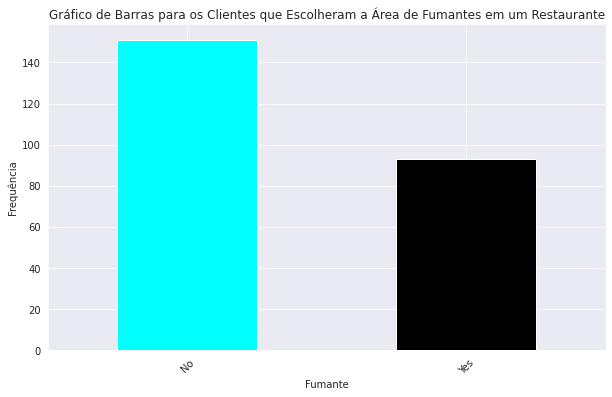

In [0]:
plt.figure(figsize=(10, 6))

tips['smoker'].value_counts().plot(kind='bar', color=['cyan', 'black'])

plt.title('Gráfico de Barras para os Clientes que Escolheram a Área de Fumantes em um Restaurante')

plt.xlabel('Fumante')
plt.ylabel('Frequência')

#Rotacionar os ticks
plt.xticks(rotation=45)

plt.show()

**Distribuição de Frequências**



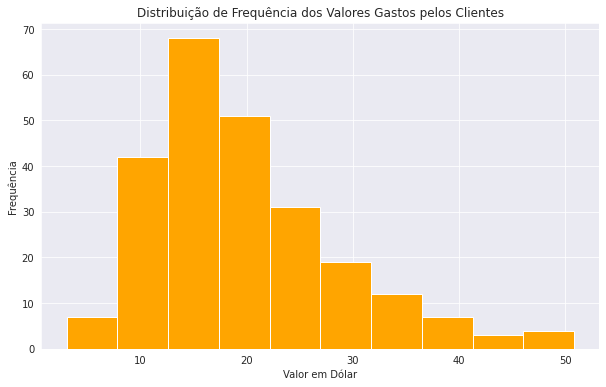

In [0]:
plt.figure(figsize=(10, 6))

tips['total_bill'].plot(kind='hist', color='orange')

plt.title('Distribuição de Frequência dos Valores Gastos pelos Clientes')

plt.xlabel('Valor em Dólar')
plt.ylabel('Frequência')

plt.show()

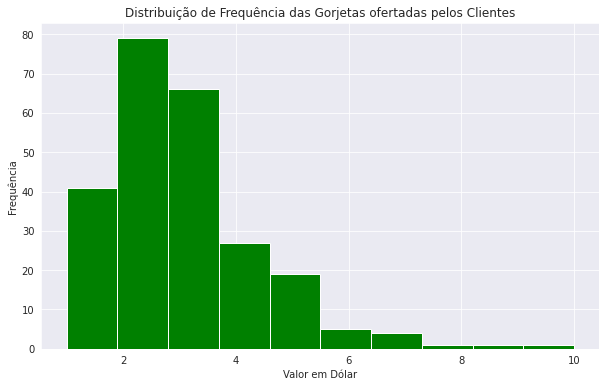

In [0]:
plt.figure(figsize=(10, 6))

tips['tip'].plot(kind='hist', color='green')

plt.title('Distribuição de Frequência das Gorjetas ofertadas pelos Clientes')

plt.xlabel('Valor em Dólar')
plt.ylabel('Frequência')

plt.show()

**Scatter Plot**

É um gráfico de dispersão que representa o comportamento de duas ou mais variáveis nos nossos dados.

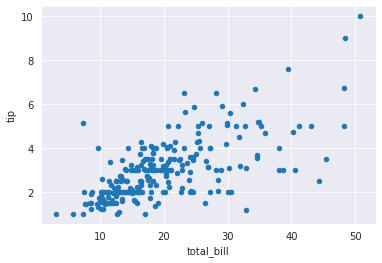

In [0]:
tips.plot(x='total_bill', y='tip', kind='scatter')

**Alterando as Propriedades do Scatter Plot**

Por padrão, a cor vem azul e o marcador vem como um ponto com tamanho pré definido. Podemos alterar isto.

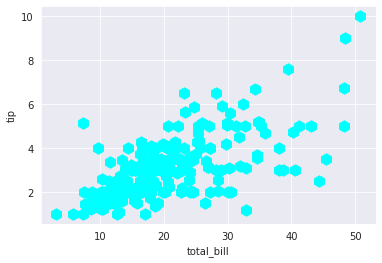

In [0]:
#Sobrescrevendo as propriedades color, marker e size.
tips.plot(x='total_bill', y='tip', kind='scatter', color='cyan', marker='h', s=130);

**Gráfico de Pizza**

Filtrando todos os Fumantes.

In [0]:
fumantes = tips.loc[tips.smoker == 'Yes']
fumantes = fumantes['smoker'].count()
fumantes

93

Filtrando todos os Não Fumantes.

In [0]:
nao_fumantes = tips.loc[tips.smoker == 'No']
nao_fumantes = nao_fumantes['smoker'].count()
nao_fumantes

151

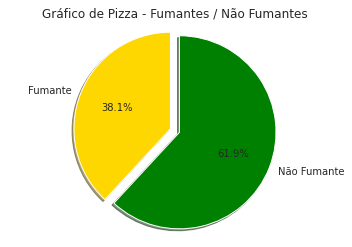

In [0]:
#Labels e Valores correspondentes
labels = ['Fumante', 'Não Fumante']
sizes = [fumantes, nao_fumantes]

#Criar a Área da Figura
fig1, ax1 = plt.subplots()

#Definir Função de Explosão, no Gráfico
explode = (0.1, 0)

#Criar o Gráfico de Pizza
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=['gold', 'green'])

plt.title('Gráfico de Pizza - Fumantes / Não Fumantes')

#Deixando o Gráfico Redondo
ax1.axis('equal')

plt.show()

Filtrando os homens que são Fumantes.

In [0]:
fumantes_masc = tips.loc[tips.sex == 'Male']
fumantes_masc = fumantes_masc.loc[fumantes_masc.smoker == 'Yes']
fumantes_masc = fumantes_masc['smoker'].count()
fumantes_masc

60

Filtrando os homens que não são Fumantes.

In [0]:
nao_fumantes_masc = tips.loc[tips.sex == 'Male']
nao_fumantes_masc = nao_fumantes_masc.loc[nao_fumantes_masc.smoker == 'No']
nao_fumantes_masc = nao_fumantes_masc['smoker'].count()
nao_fumantes_masc

97

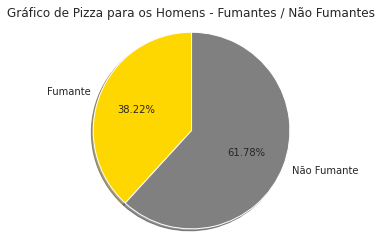

In [0]:
labels = ['Fumante', 'Não Fumante']
sizes = [fumantes_masc, nao_fumantes_masc]

#Criar a Área da Figura
fig1, ax1 = plt.subplots()

#Criar o Gráfico de Pizza
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, colors=['gold', 'grey'])

plt.title('Gráfico de Pizza para os Homens - Fumantes / Não Fumantes')

ax1.axis('equal')

plt.show()

Filtrando as mulheres que são Fumantes.

In [0]:
fumantes_fem = tips.loc[tips.sex == 'Female']
fumantes_fem = fumantes_fem.loc[fumantes_fem.smoker == 'Yes']
fumantes_fem = fumantes_fem['smoker'].count()
fumantes_fem

33

Filtrando as mulheres que não são Fumantes.

In [0]:
nao_fumantes_fem = tips.loc[tips.sex == 'Female']
nao_fumantes_fem = nao_fumantes_fem.loc[nao_fumantes_fem.smoker == 'No']
nao_fumantes_fem = nao_fumantes_fem['smoker'].count()
nao_fumantes_fem

54

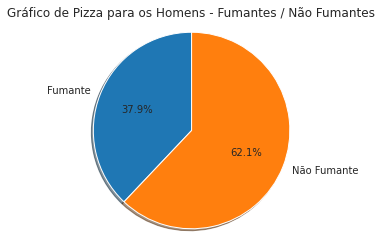

In [0]:
labels = ['Fumante', 'Não Fumante']
sizes = [fumantes_fem, nao_fumantes_fem]

#Criar a Área da Figura
fig1, ax1 = plt.subplots()

#Criar o Gráfico de Pizza
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Gráfico de Pizza para os Homens - Fumantes / Não Fumantes')

ax1.axis('equal')

plt.show()

**Introdução a Seaborn**

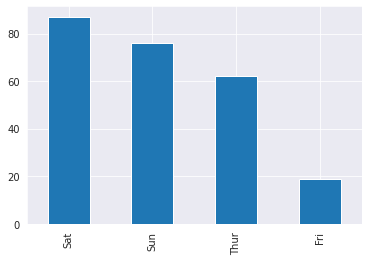

In [0]:
  tips['day'].value_counts().plot(kind='bar')

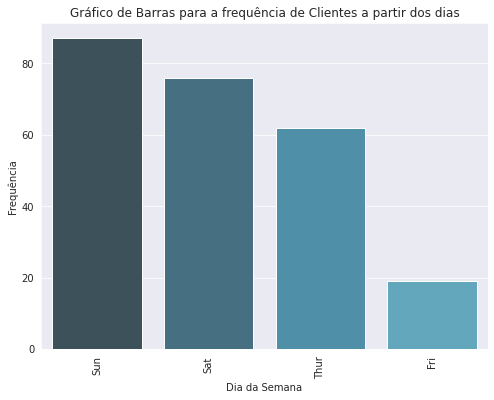

In [0]:
#Definindo o Estilo dos Gráficos
sns.set_style('darkgrid')

#Aumentando o tamanho da figura
plt.figure(figsize=(8, 6))

#Gerando um gráfico de Barras com Seaborn
#Configurando exibição a partir de uma Paleta de Cores configurada
sns.barplot(x=tips['day'].unique(), y=tips.day.value_counts(),
            palette=sns.color_palette('GnBu_d'))

plt.title('Gráfico de Barras para a frequência de Clientes a partir dos dias')

plt.xlabel('Dia da Semana')
plt.ylabel('Frequência')

plt.xticks(rotation=90)

#Exibir Gráfico
plt.show()